In [140]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [141]:
df = pd.read_csv(r'C:\Users\HP\Downloads\movie.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [142]:
#checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [143]:
#replacing the missing data with the average value in budget and gross column

df['budget'] = df['budget'].fillna(df['budget'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())

#replacing the missing data in rating with 'not rated'

df['rating'].fillna('Not Rated',inplace = True)

In [144]:
#confirmation of the replaced missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [145]:
#checking the datatype
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [146]:
#changing data types of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [147]:
#creating correct year column

yearSplit = df['released'].str.split(', ',expand = True)
df['yearCorrect'] = yearSplit[1].str[:4].astype(str)

In [148]:
df.sort_values(by=['gross'], inplace=False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [149]:
pd.set_option('display.max_rows', None)

In [150]:
df.drop_duplicates().head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


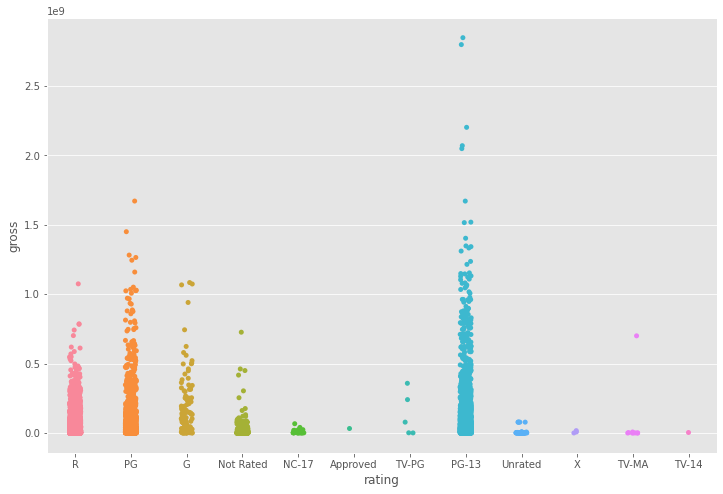

In [151]:
#rating vs gross

sns.stripplot(x="rating", y="gross", data=df);


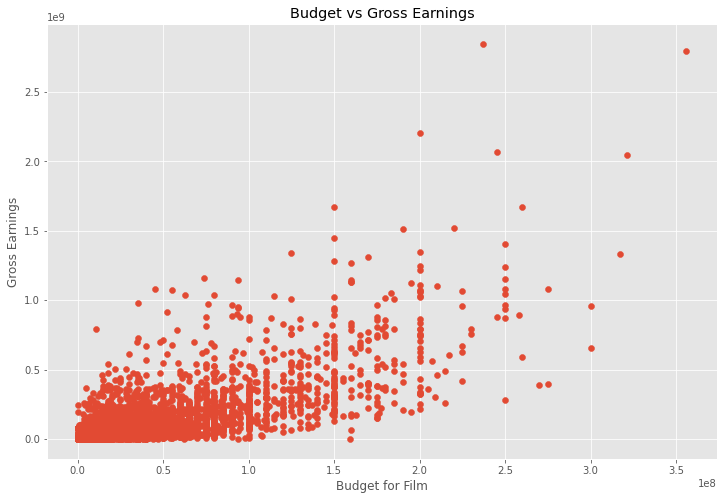

In [152]:
#Scatter plot of budget vs revenue

plt.scatter(x = df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')
plt.show()

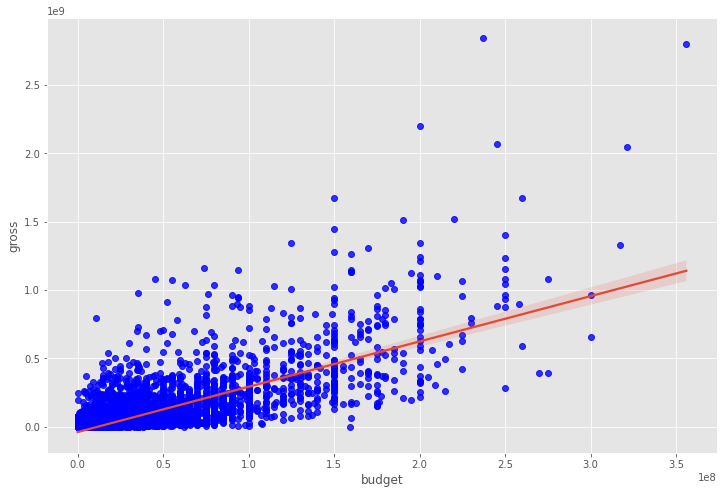

In [153]:
# plot budget vs gross usin seaborn

sns.regplot(x='budget', y = 'gross', data = df, scatter_kws={'color':'blue'});

In [154]:
#exploring correlation
#pearson is the default correlation
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


In [155]:
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


In [156]:
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.144258,0.182415,0.097184
score,0.067652,1.000000,0.300115,0.003530,0.080368,0.283611
votes,0.331465,0.300115,1.000000,0.161853,0.507896,0.198240
budget,0.144258,0.003530,0.161853,1.000000,0.258476,0.161757
gross,0.182415,0.080368,0.507896,0.258476,1.000000,0.156061
runtime,0.097184,0.283611,0.198240,0.161757,0.156061,1.000000


In [157]:
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.202558,0.267101,0.142977
score,0.099045,1.000000,0.428138,0.004735,0.118024,0.399857
votes,0.469829,0.428138,1.000000,0.235205,0.688537,0.290159
budget,0.202558,0.004735,0.235205,1.000000,0.361668,0.227921
gross,0.267101,0.118024,0.688537,0.361668,1.000000,0.227892
runtime,0.142977,0.399857,0.290159,0.227921,0.227892,1.000000


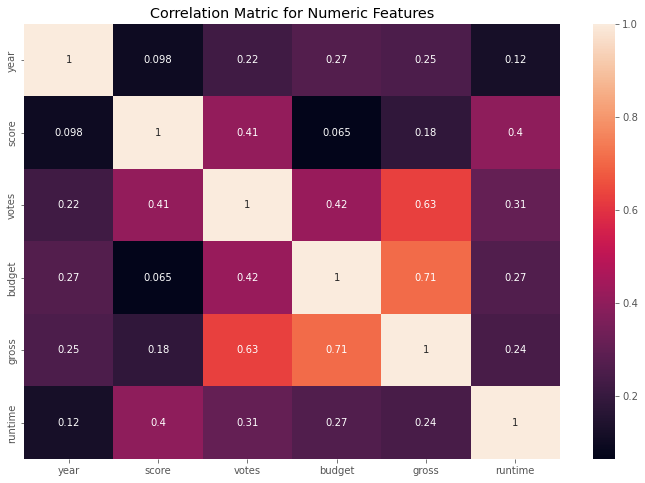

In [158]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)
plt.title('Correlation Matric for Numeric Features')
plt.show()

In [159]:
#Numerizing all strings to allow for correlation

df_numerized = df
df_col = df_numerized.columns

for col_name in df_col:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


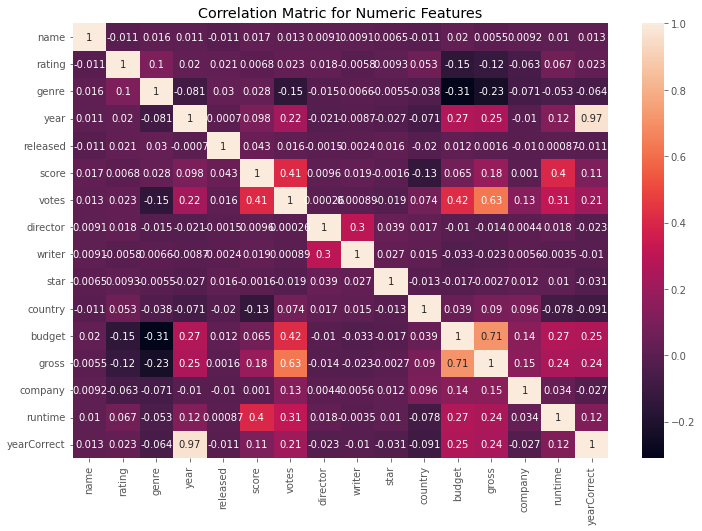

In [160]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot =True)
plt.title('Correlation Matric for Numeric Features')
plt.show()

In [161]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
name,1.000000,-0.010860,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010392,0.012855
rating,-0.010860,1.000000,0.104108,0.019913,0.021150,0.006828,0.022824,0.018466,-0.005808,0.009278,0.053417,-0.148372,-0.122037,-0.062582,0.067197,0.022801
genre,0.016355,0.104108,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711,-0.063555
year,0.011453,0.019913,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120811,0.967465
released,-0.011311,0.021150,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000868,-0.010612
score,0.017097,0.006828,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451,0.107198
votes,0.013088,0.022824,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212,0.206468
director,0.009079,0.018466,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624,-0.022580
writer,0.009081,-0.005808,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511,-0.010072
star,0.006472,0.009278,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174,-0.031164


In [162]:
df_numerized.corr().unstack()

name         name           1.000000
             rating        -0.010860
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020368
             gross          0.005466
             company        0.009211
             runtime        0.010392
             yearCorrect    0.012855
rating       name          -0.010860
             rating         1.000000
             genre          0.104108
             year           0.019913
             released       0.021150
             score          0.006828
             votes          0.022824
             director       0.018466
             writer        -0.005808
             star           0.009278
             country        0.053417
 

In [163]:
sorted_corr = df_numerized.corr().unstack().sort_values()
sorted_corr

genre        budget        -0.310566
budget       genre         -0.310566
genre        gross         -0.230267
gross        genre         -0.230267
rating       budget        -0.148372
budget       rating        -0.148372
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.122037
gross        rating        -0.122037
yearCorrect  country       -0.091035
country      yearCorrect   -0.091035
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
company      genre         -0.071067
genre        company       -0.071067
year         country       -0.070938
country      year          -0.070938
genre        yearCorrect   -0.063555
yearCorrect  genre         -0.063555
company      rating        -0.062582
rating       company       -0.062582
runtime      genre         -0.052711
g

In [164]:
#sorting the high correlation

high_corr = sorted_corr[(sorted_corr > 0.5)]
high_corr

votes        gross          0.628713
gross        votes          0.628713
             budget         0.711270
budget       gross          0.711270
year         yearCorrect    0.967465
yearCorrect  year           0.967465
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearCorrect  yearCorrect    1.000000
dtype: float64